In [1]:
import yfinance as yf
from datetime import date
import Stat_Tool
import IV

# User Input

In [2]:
ticker=str(input("Please insert the ticker symbol according to Yahoo Finance: "))
start_date="2013-01-01"
end_date=date.today().strftime("%Y-%m-%d")
asset_data=yf.download(ticker, start=start_date, end=end_date)

Please insert the ticker symbol according to Yahoo Finance: GS
[*********************100%***********************]  1 of 1 completed


# Calculating Daily, Weekly and Monthly Volatility

In [3]:
asset_data['Return'] = 100*(asset_data['Close'].pct_change())
asset_data.dropna(inplace=True)

Stat_Tool.Empirical_Volatility_Study(ticker, asset_data)

╒════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│    │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ GS │         1.69         │          7.74          │         26.83         │
╘════╧══════════════════════╧════════════════════════╧═══════════════════════╛


# Volatility Prediction

## GARCH Model

In [4]:
p_range = [i for i in range(1,6)]
q_range = [i for i in range(1,6)]
gm_result = Stat_Tool.GARCH_Model_Selection(asset_data, p_range , q_range)

omega       0.518939
alpha[1]    0.076787
beta[1]     0.738422
Name: params, dtype: float64

 Where: 
 mu = mean return 
 omega = long-term average 
 alpha = short-run volatility 
 beta = persistence of volatility
Selected GARCH Model: p = 1, q = 1


## EWMA Model

In [5]:
selected_l = Stat_Tool.EWMA_Model_Study(asset_data)

EWMA lambda:  0.9303713198206957


## Next Day Volatility Prediction

In [6]:
garch_vol, EWMA_vol, Implied_Volatility = Stat_Tool.next_volatility_prdiction(ticker, asset_data, selected_l, gm_result)

╒════╤════════════════════════════════╤═══════════════════════════════╤════════════════════════╕
│    │  GARCH Predicted Volatility %  │  EWMA Predicted Volatility %  │  Implied Volatility %  │
╞════╪════════════════════════════════╪═══════════════════════════════╪════════════════════════╡
│ GS │              1.50              │             1.33              │          1.53          │
╘════╧════════════════════════════════╧═══════════════════════════════╧════════════════════════╛


## Coming Year Volatility Prediction from Implied Volatility

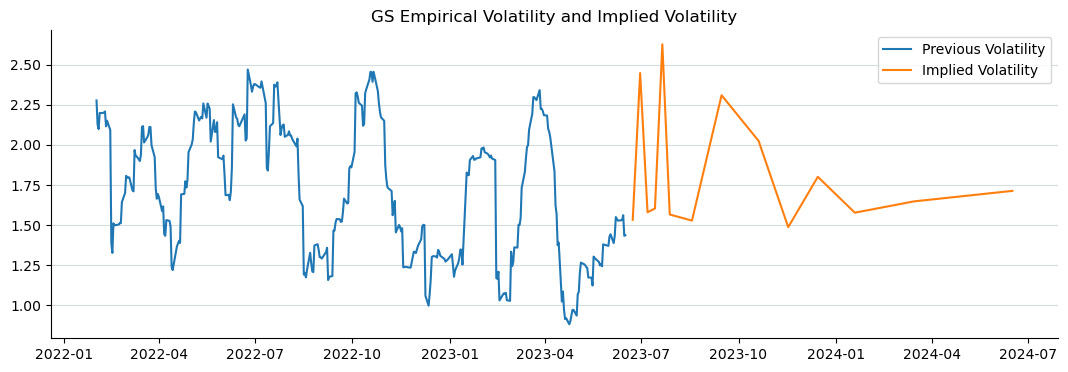

In [7]:
Stat_Tool.volatility_graph(ticker, asset_data, Implied_Volatility)

# Implied Volatility Surface

Please enter the strike level bound (range from 5 to 95) (multiple of 5): 20


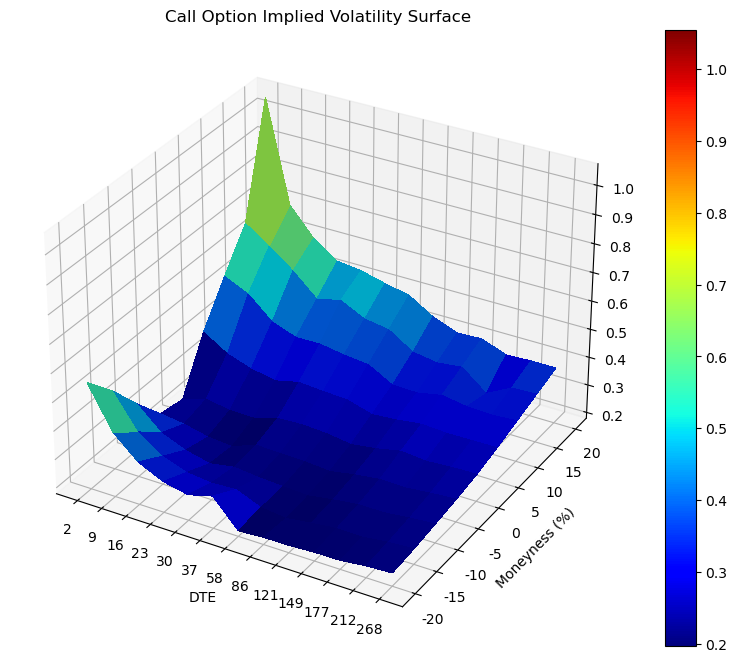

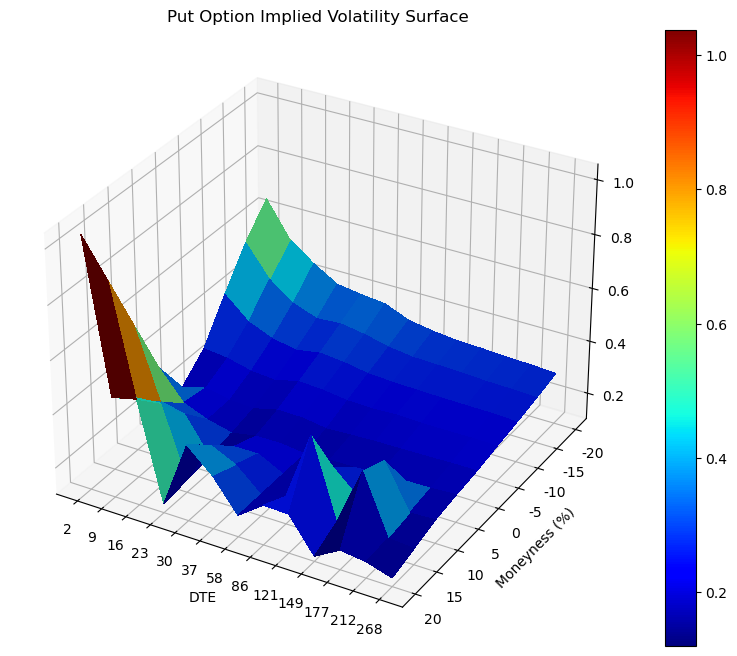

In [10]:
while True:
    strike_level_bound = input('Please enter the strike level bound (range from 5 to 95) (multiple of 5): ')
    try:
        strike_level_bound = int(strike_level_bound)
        if strike_level_bound%5!=0:
            print('Non multiple of 5, please try again')
            continue
        elif strike_level_bound > 95 or strike_level_bound < 5 :
            print('out of range, please try again')
            continue
        break
    except:
        print('Non numeric input, please try again')
        pass

IV.plot_implied_volatility_surface(ticker, strike_level_bound)

# Daily Return Distribution

Please enter the length of look back period for daily return distribution: 60


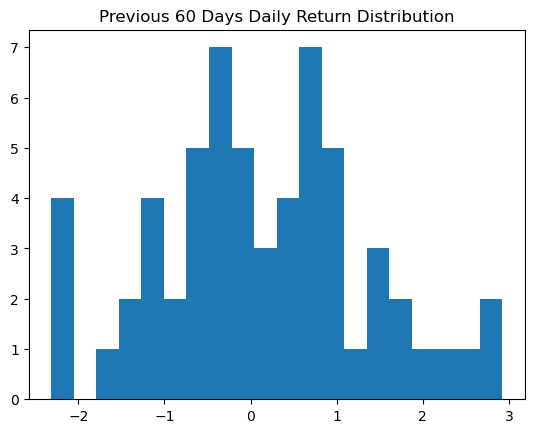

╒════╤══════════╤════════════════╤══════════════╤══════════════╕
│    │  Mean %  │  Volatility %  │  Skewness %  │  Kurtosis %  │
╞════╪══════════╪════════════════╪══════════════╪══════════════╡
│ GS │   0.13   │      1.22      │     0.13     │    -0.35     │
╘════╧══════════╧════════════════╧══════════════╧══════════════╛


In [10]:
while True:
    look_back_window = input('Please enter the length of look back period for daily return distribution: ')
    try:
        look_back_window = int(look_back_window)
        break
    except:
        print('Non numeric input, please try again')
        pass

Stat_Tool.daily_return_distribution(ticker, asset_data, look_back_window)

# Confidence Interval on Next Day Close Price

In [11]:
while True:
    confidence_level = input('Please enter the target confidence level (0-1) : ')
    try:
        confidence_level = float(confidence_level)
        if confidence_level<0 or confidence_level>1 :
            continue
        break
    except:
        print('Non numeric input, please try again')
        pass

Stat_Tool.confidence_interval_next_close_price(asset_data, confidence_level, garch_vol, EWMA_vol, Implied_Volatility.iloc[0][0])

Please enter the target confidence level (0-1) : 0.8
╒═════════════╤═══════════════╤══════════════╤══════════════════════╕
│             │  GARCH Model  │  EWMA Model  │  Implied Volatility  │
╞═════════════╪═══════════════╪══════════════╪══════════════════════╡
│ lower bound │    304.62     │    308.05    │        303.99        │
├─────────────┼───────────────┼──────────────┼──────────────────────┤
│ upper bound │    364.96     │    361.53    │        365.58        │
╘═════════════╧═══════════════╧══════════════╧══════════════════════╛


# Rolling Z-score on Close Price

Please enter the length of rolling window for Z-Score: 21


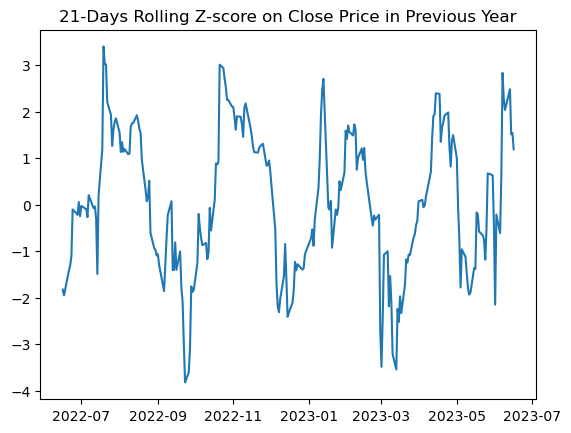

╒════╤══════════════════════╤══════════════════╕
│    │  ADF Test P Value %  │  Hurst Exponent  │
╞════╪══════════════════════╪══════════════════╡
│ GS │         0.00         │       0.20       │
╘════╧══════════════════════╧══════════════════╛


In [12]:
while True:
    rolling_windows = input('Please enter the length of rolling window for Z-Score: ')
    try:
        rolling_windows = int(rolling_windows)
        break
    except:
        print('Non numeric input, please try again')
        pass
    
Stat_Tool.Z_Score_Study(ticker, asset_data, rolling_windows)